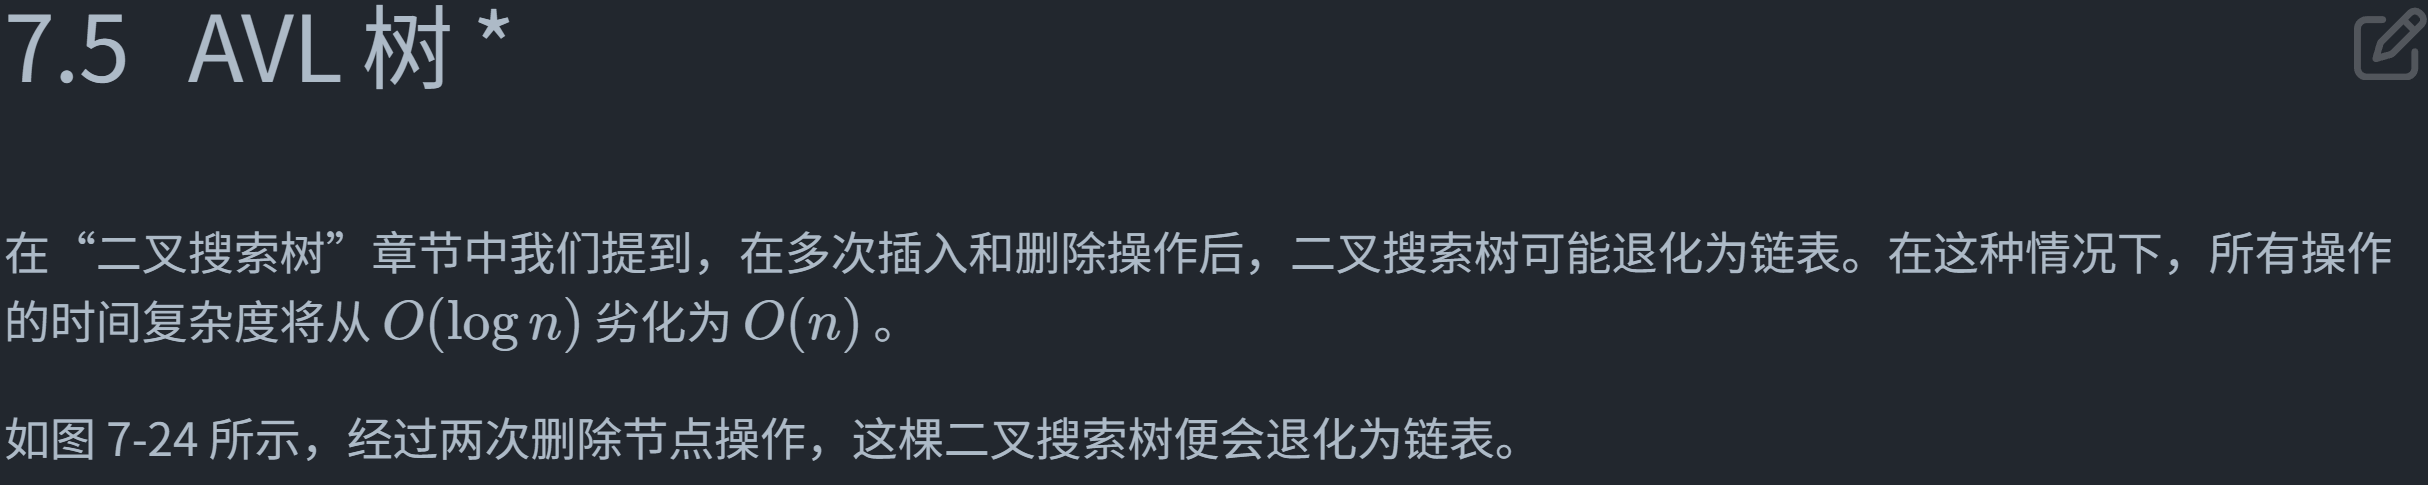
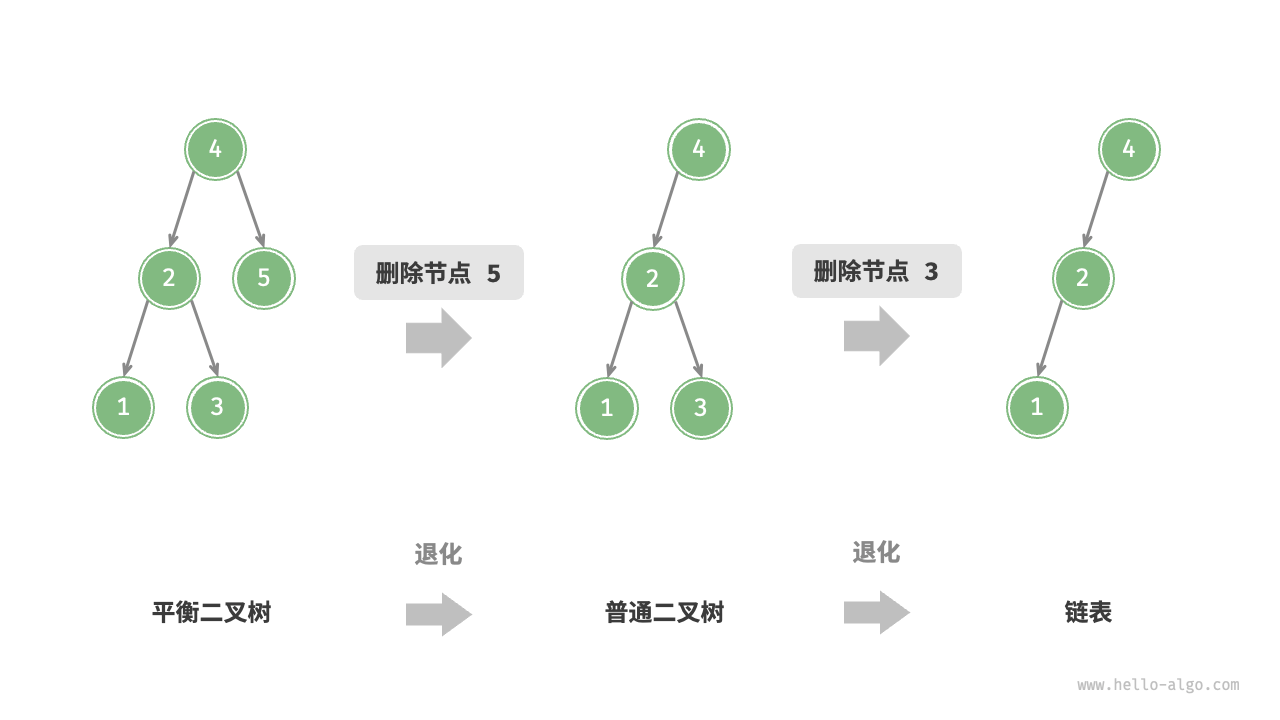

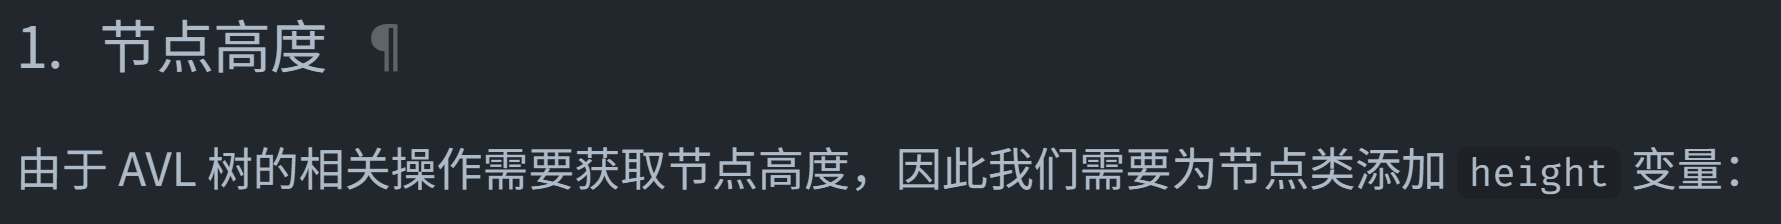

In [1]:
class TreeNode:
    """AVL Tree"""
    def __init__(self, val: int):
        self.val = val
        self.left: TreeNode | None = None
        self.right: TreeNode | None = None
        self.height: int = 0    

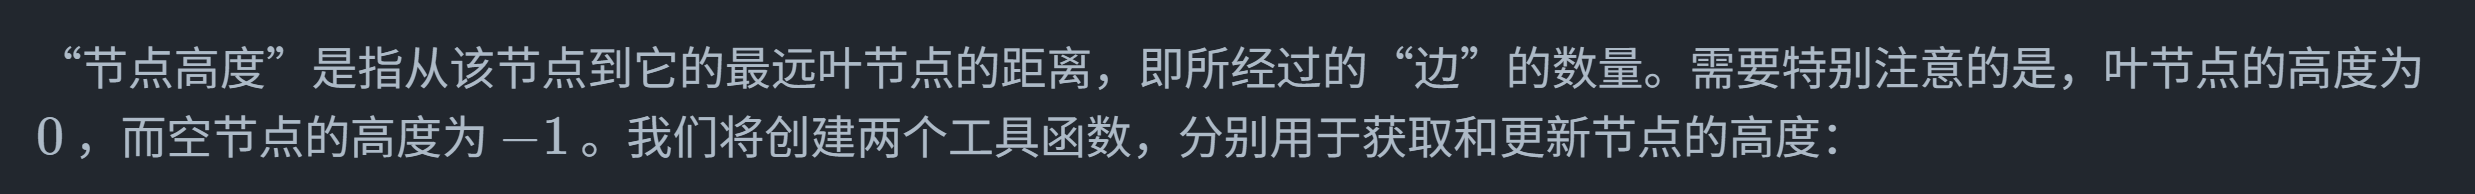

In [2]:
def height(self, node: TreeNode | None) -> int:
    if node is not None:
        return node.height
    return -1

def update_height(self, node: TreeNode | None):
    node.height = max([self.height(node.left), self.height(node.right)]) + 1

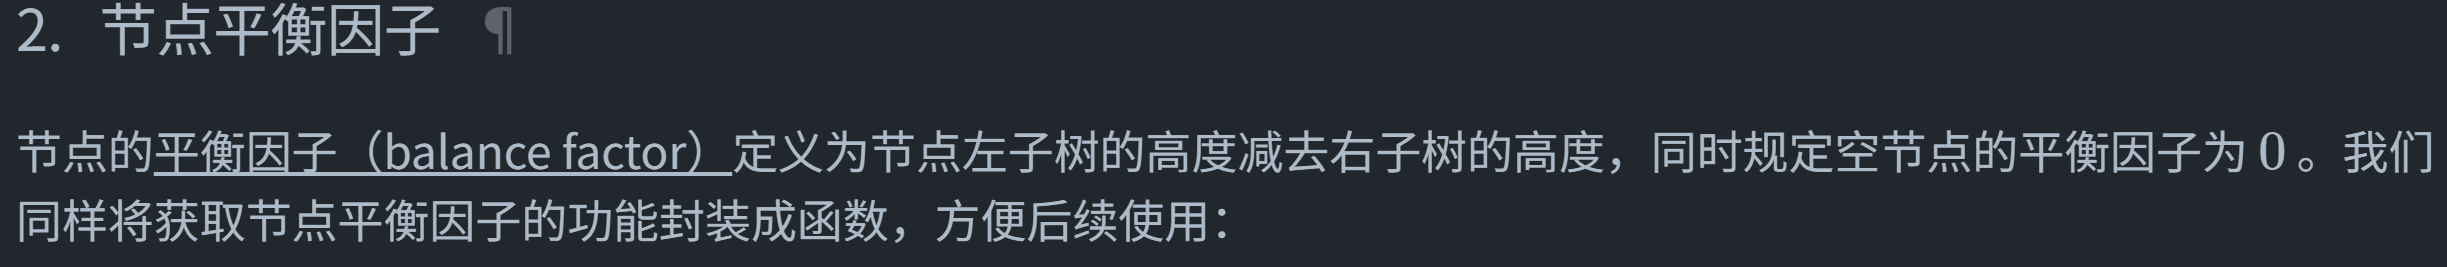

In [3]:
def balance_factor(self, node: TreeNode | None) -> int:
    if node is None:
        return 0
    return self.height(node.left) - self.height(node.right)

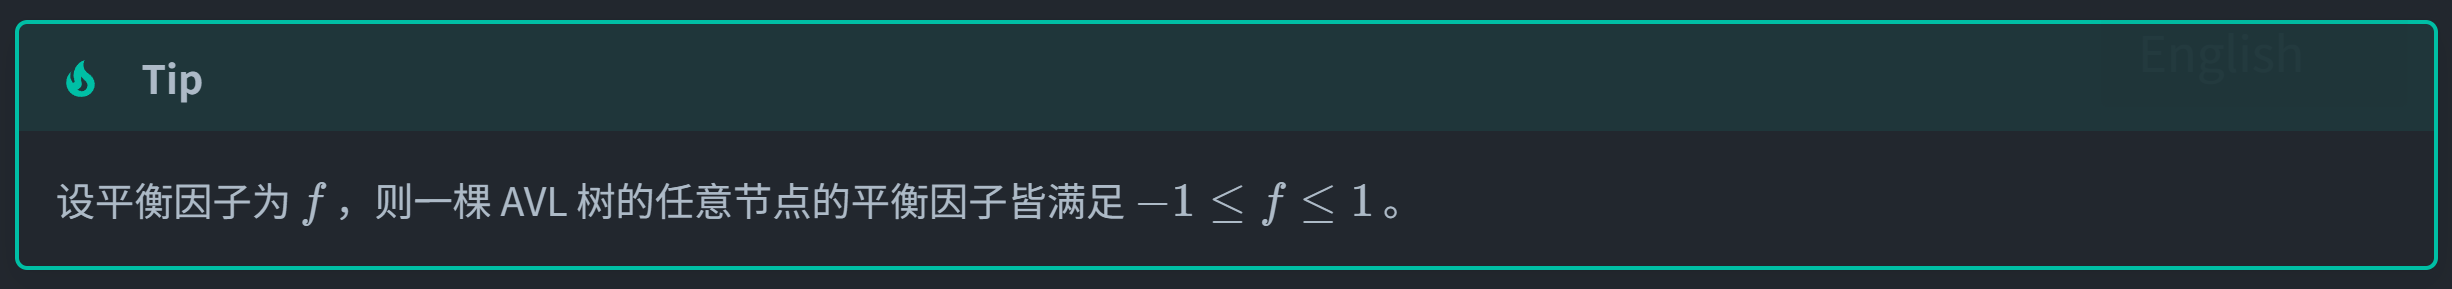

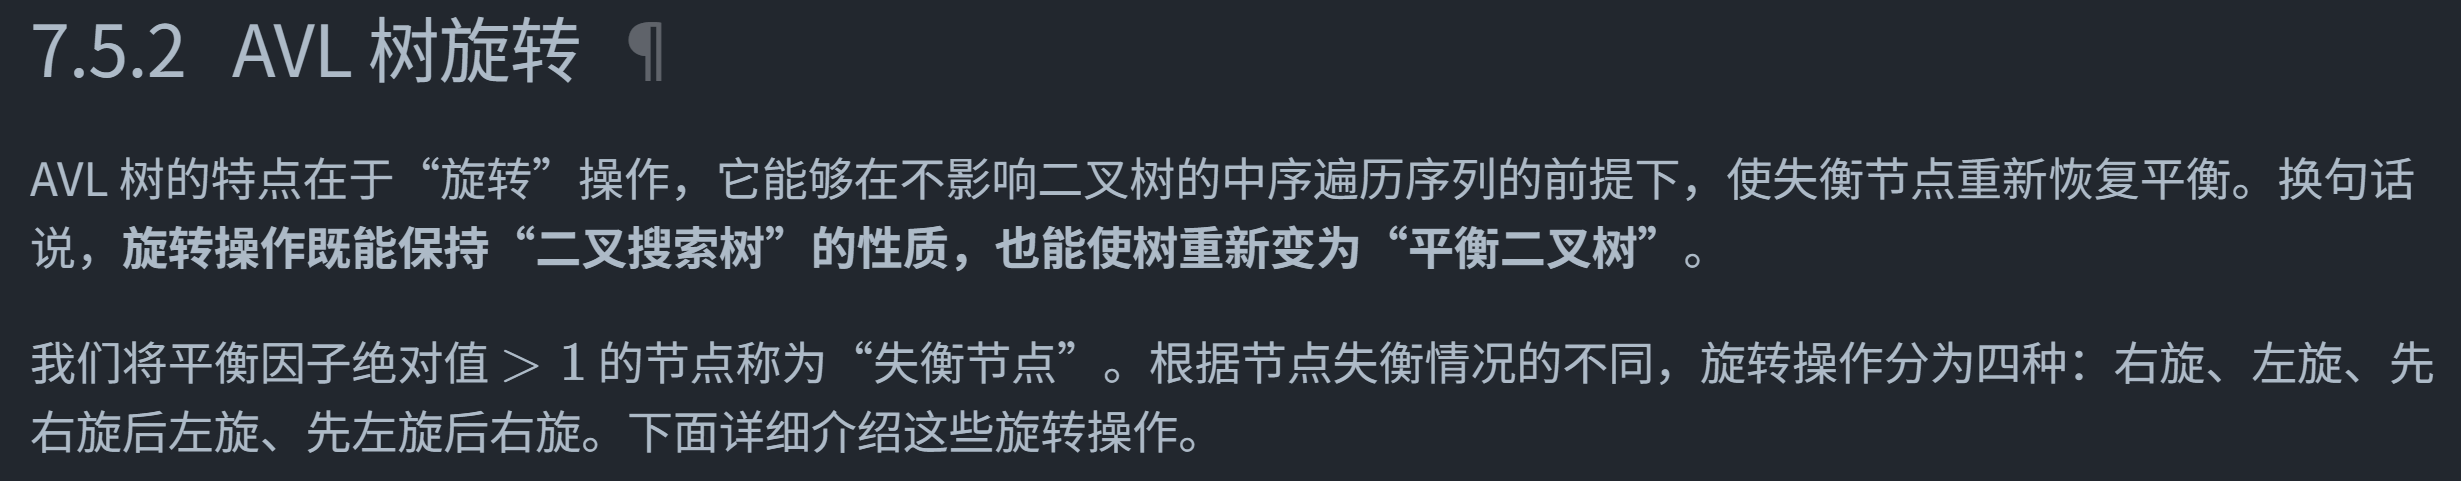
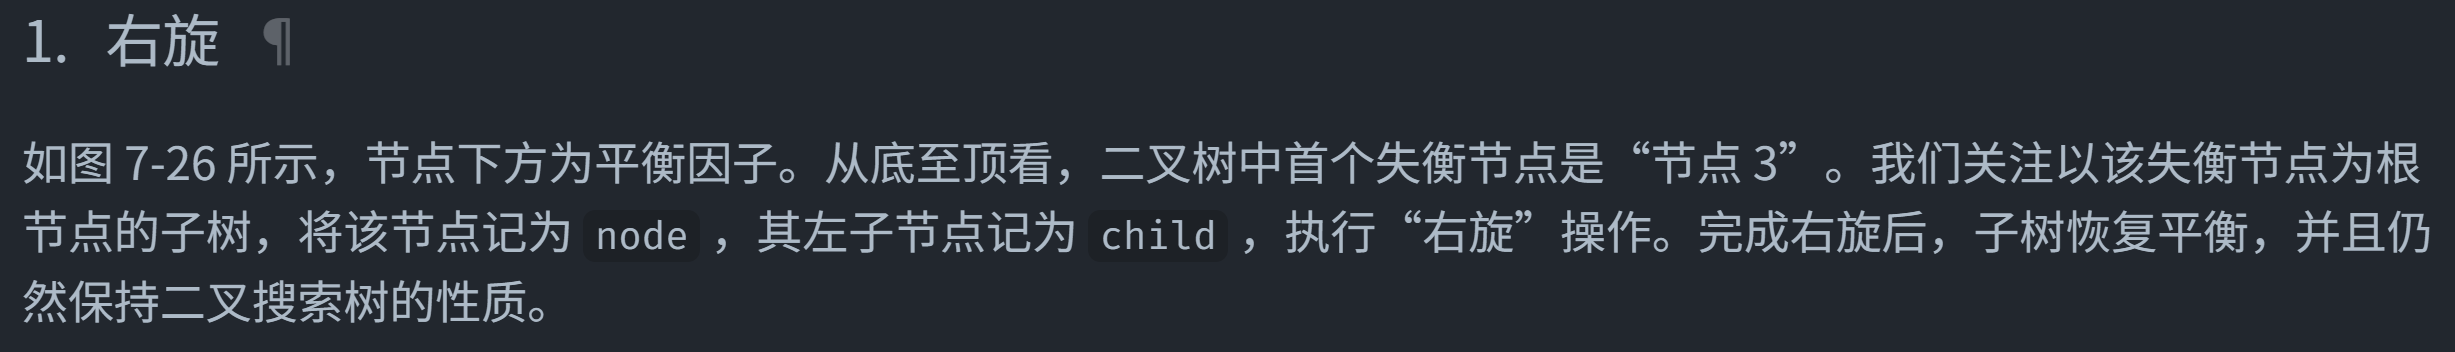
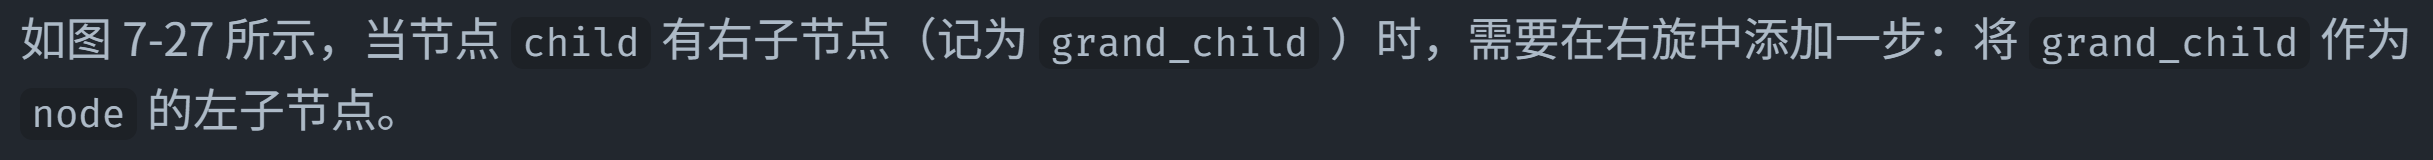
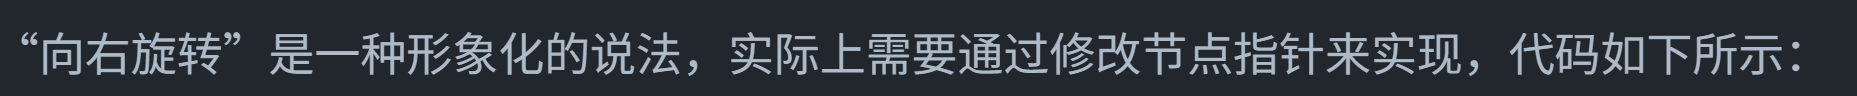

In [ ]:
def right_rotate(self, node: TreeNode | None) -> TreeNode | None:
    """右旋操作"""
    child = node.left
    grand_child = child.right
    # 以child为原点，将node向右旋转
    child.right = node
    node.left = grand_child
    # 更新节点高度
    self.updata_height(node)
    self.updata_height(child)
    # 返回旋转后子树的根节点
    return child

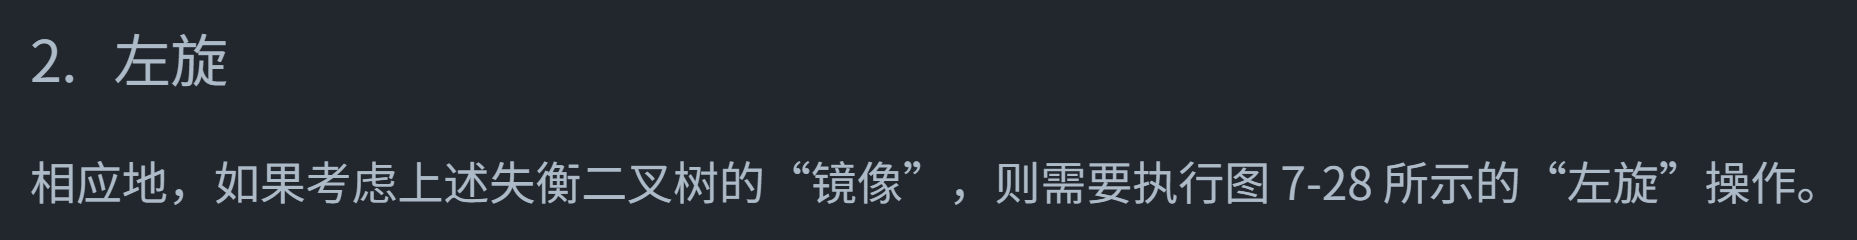
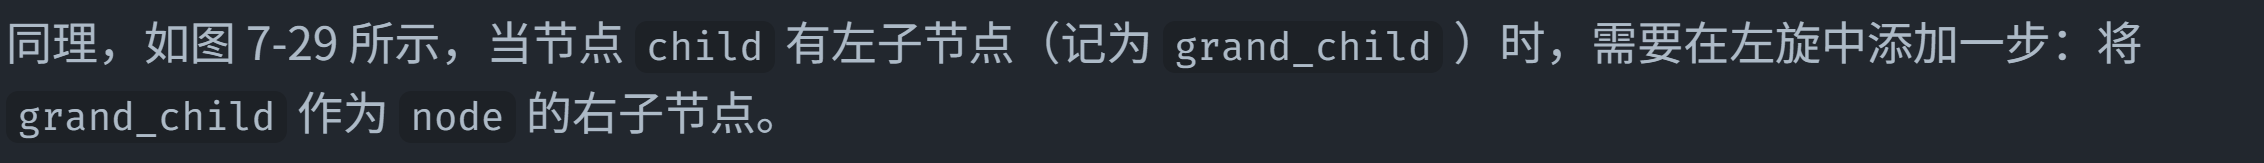
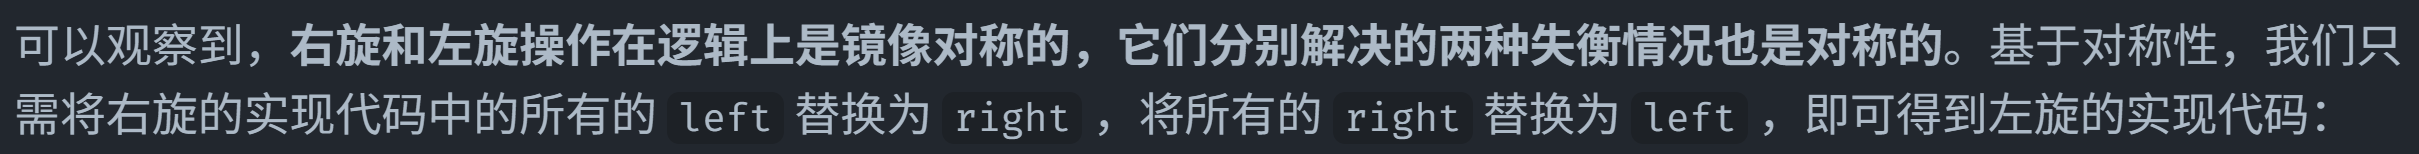

In [4]:
def left_rotate(self, node: TreeNode | None) -> TreeNode | None:
    child = node.right
    grand_child = child.left
    child.left = node
    node.right = grand_child
    # 更新节点高度
    self.update_height(child)
    self.update_height(node)
    # 返回旋转后子树的根节点
    return child

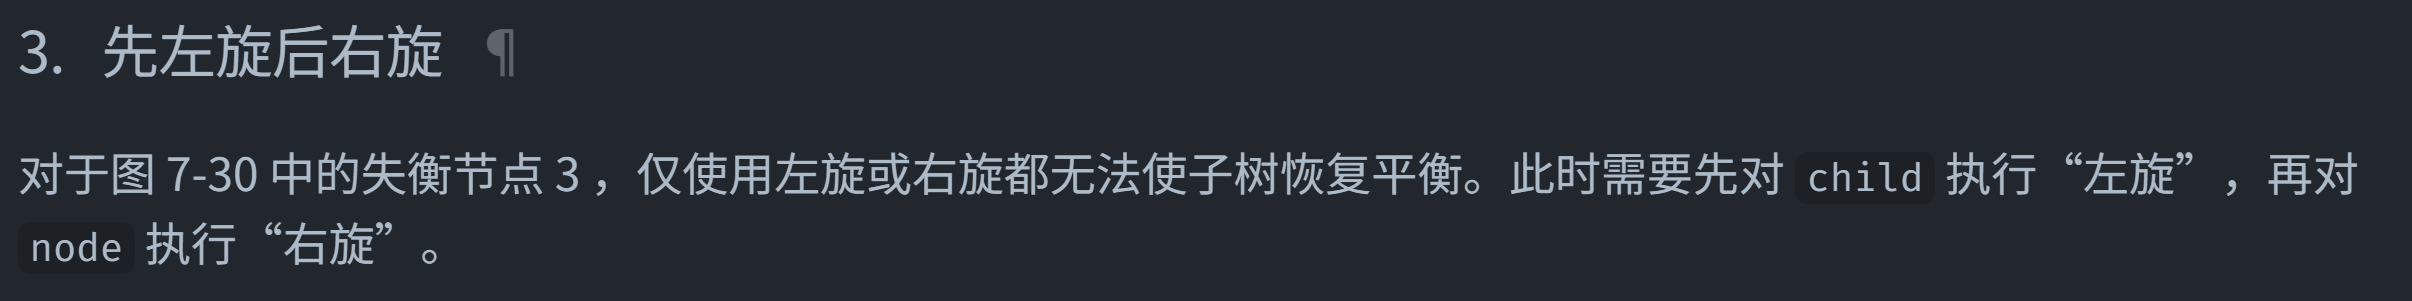

In [ ]:
def rotate(self, node: TreeNode | None) -> TreeNode | None:
    # 获取节点 node 的平衡因子
    balance_factor = self.balance_factor(node)
    # 左偏树
    if balance_factor > 1:
        if self.balance_factor(node.left) >= 0:
            return self.right_rotate(node)
        else:
            node.left = self.left_ratat(node.left)
            return self.right_rotate(node)
    # 右偏树
    elif balance_factor < -1:
        if self.balance_factor(node.right) <= 0:
            return self.left_rotate(node)
        else:
            # 先右旋后左旋
            node.right = self.right_rotate(node.right)
            return self.left_rotate(node)
    # 平衡树，无须旋转，直接返回
    return node

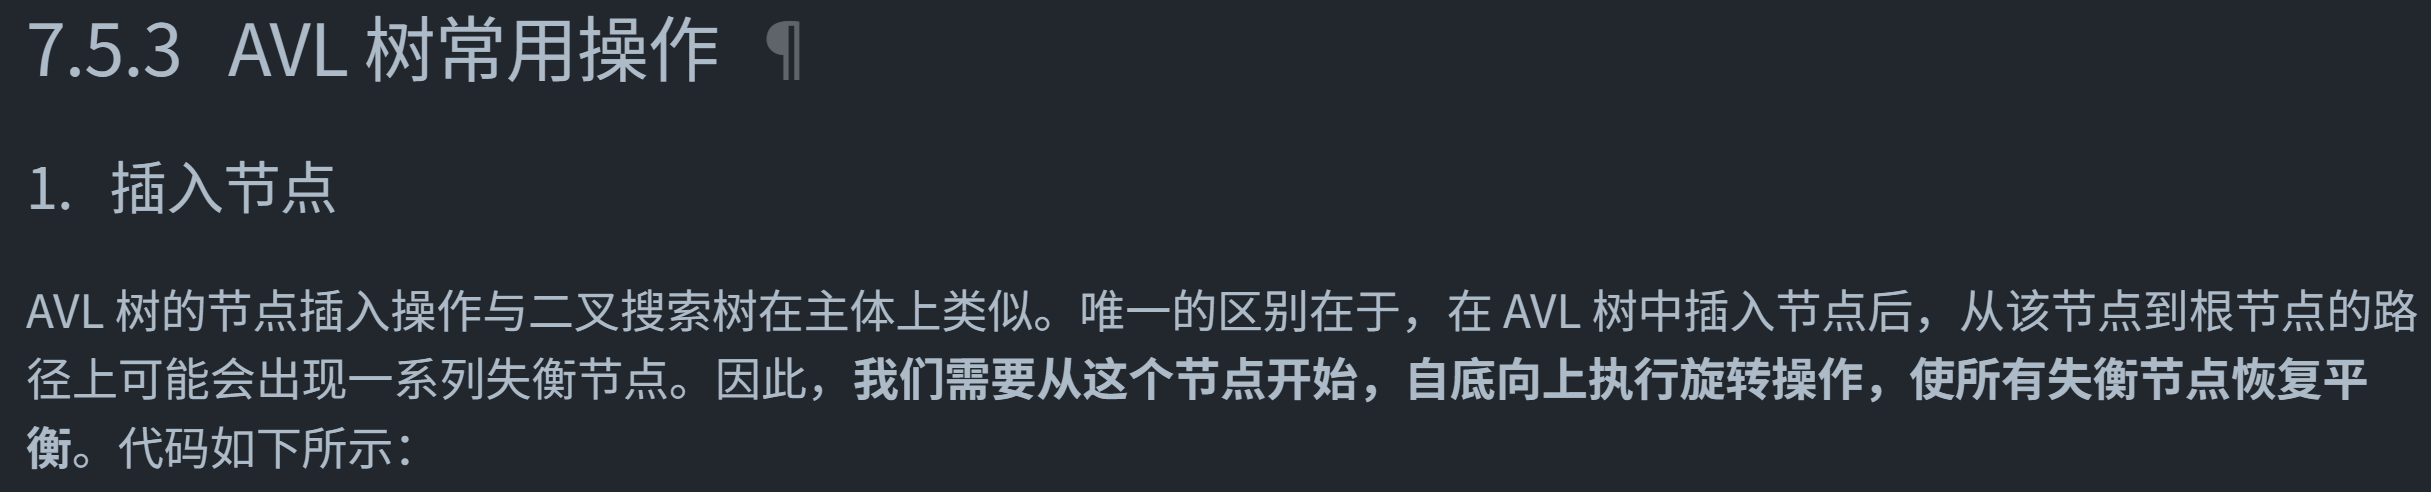

In [7]:
def insert(self, val):
    """插入节点"""
    self._root = self.insert_helper(self._root, val)

def insert_helper(self, node: TreeNode | None, val: int) -> TreeNode:
    """递归插入节点"""
    if node is None:
        return TreeNode(val)
    # 1. 查找插入位置并插入节点
    if val < node.val:
        node.left = insert_helper(node.left, val)
    elif val > node.val:
        node.right = insert_helper(node.right, val)
    else:
        # 重复节点不插入，直接返回
        return node
    # 更新节点高度
    self.update_height(node)
    # 2. 执行旋转操作，使该子树重新恢复平衡
    return self.rotate(node)

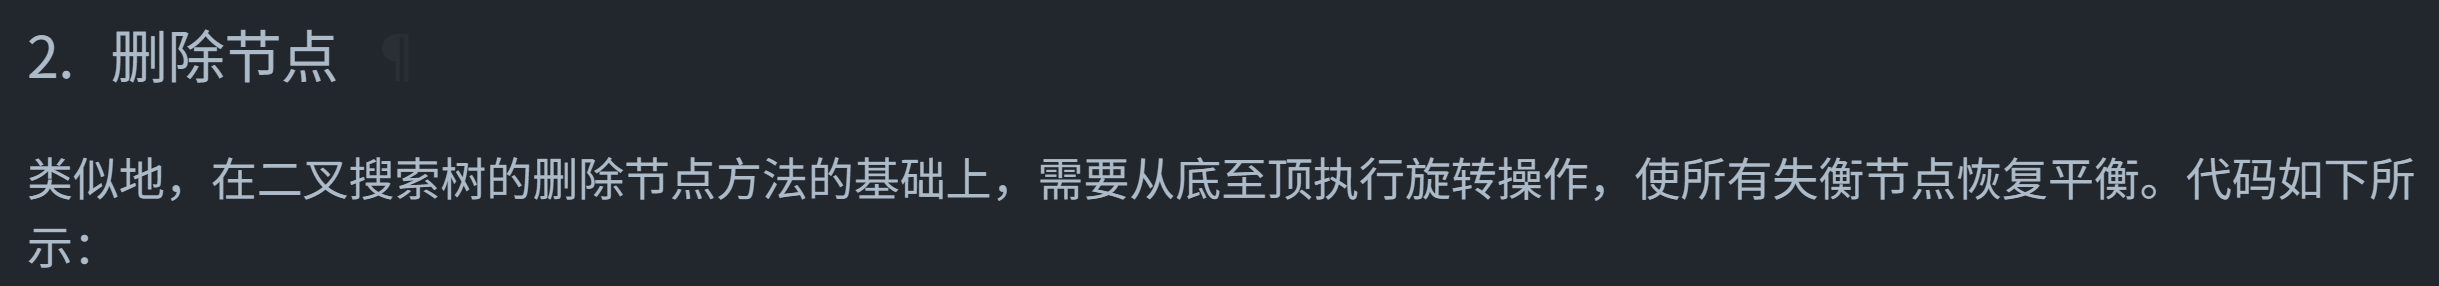

In [8]:
def remove(self, val: int):
    """删除节点"""
    self._root = self.remove_helper(self._root, val)

def remove_helper(self, node: TreeNode | None, val: int) -> TreeNode | None:
    """递归删除节点"""
    if node is None:
        return None
    # 1. 查找节点并删除
    if val < node.val:
        node.left = self.remove_helper(node.left, val)
    elif val > node.val:
        node.right = self.remove_helper(node.right, val)
    else:
        if node.left is None or node.right is None:
            child = node.left or node.right
            # 子节点数量 == 0， 直接删除node并返回
            if child is None:
                return None
            else:
                node = child
        else:
            # 子节点数 == 2，则中序遍历的下个节点删除，并用该节点替换当前节点
            temp = node.right
            while temp.left is not None:
                temp = temp.left
            node.right = self.remove_helper(node.right, temp.val)
            node.val = temp.val
    # 更新节点高度
    self.update_height(node)
    # 2. 执行旋转操作，使该子树重新恢复平衡
    return self.rotate(node)

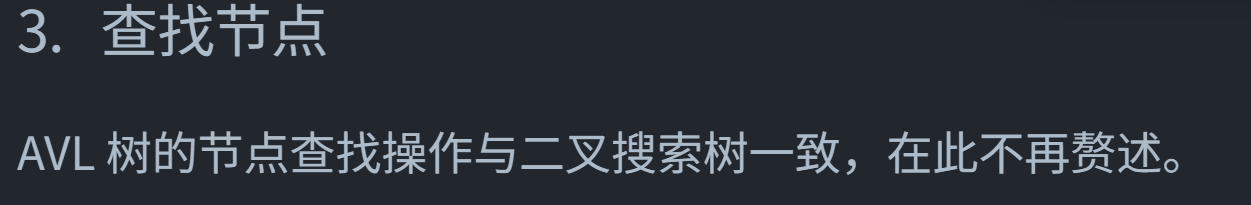
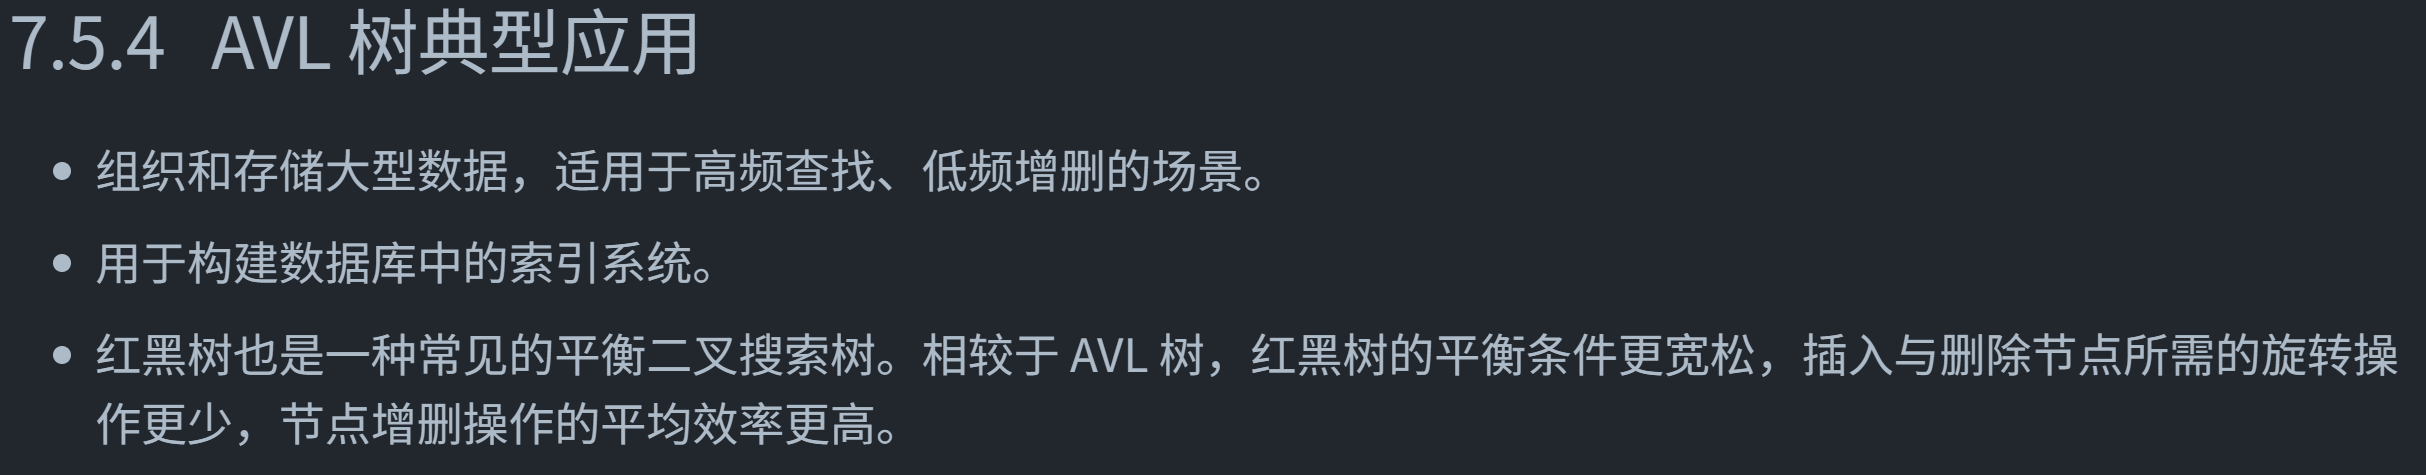